## 1- Data gathering:
Gather each of the three pieces of data: 
a. The WeRateDogs Twitter archive.
b. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 
c. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting.


In [1]:
#Import needed packages:
import pandas as pd 
import numpy as np
import json
import twython
import re
import requests
from bs4 import BeautifulSoup
import os
import seaborn as sb
import tweepy
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define and impoet twitter archive:
#This is will meet requirment a.Gather The WeRateDogs Twitter archive.
twitter_archive_enhanced = pd.read_csv("twitter_archive_enhanced.csv")
#Check data presntation: 
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
#Check data types: 
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

By checking data (WeRateDogsArchive) info there are a lot of missing values.

In [4]:
# Import image_predictions.tsv from local space (it can be downloaded programmaticaly using requests.get, 
# but since I have all files as zip file I prefered to import it directly from local area.)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
#Check data presntation: 
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
#Check data types: 
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


By checking data (ImaP) info it shows no missing values. 

To achive requirment c. gather each tweet's retweet count and favorite. I'm supposed to use tweepy and create a json file using below code. I treid to contact twiitter to have a developer account but my request was rejected and they asked for more details of the request reason and the deadline of this project is within 2 days so I prefered to go ahead and use json file provided to us rather than being late on submitting this project. Please, accept ,y apology.

Code provided from Udacity:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [6]:
# To achive requirment c. gather each tweet's retweet count and favorite.
# Read line by line and crate a new data frame with specefic arranged information:
TweetData = []
with open('tweet_json.txt') as tweetJ:
    TweetJason = tweetJ.readlines()
    for json_line in TweetJason:
        tweet = json.loads(json_line)
        ID = tweet['id']
        RetweetCount = tweet['retweet_count']
        FavoriteCount = tweet['favorite_count']
        TweetText = tweet['full_text']
        TweetCreate = tweet['created_at']
        TweetSource = tweet['source']
        
        TweetData.append([ID,RetweetCount,FavoriteCount,TweetText,TweetCreate,TweetSource])

twitter_api = pd.DataFrame()
twitter_api = twitter_api.append(TweetData).rename(columns={0:'tweet_id', 1:'retweets', 2:'favorites', 3:'Text', 4:'CrateDate', 5:'Source'})

In [7]:
twitter_api.head(2)

,tweet_id,retweets,favorites,Text,CrateDate,Source
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."


## 2- Data Assessing:
Requirment: after gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.



### a. Asssess WeRateDogsArchive:

In [8]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# to check number of missing values:
# I tried to sum all missing value as following:
#WeRateDogsArchive.in_reply_to_status_id.notnull().sum()
#WeRateDogsArchive.in_reply_to_user_id.notnull().sum()
#WeRateDogsArchive.retweeted_status_id.notnull().sum()
#WeRateDogsArchive.retweeted_status_user_id.notnull().sum()
#WeRateDogsArchive.retweeted_status_timestamp.notnull().sum()
#and all gave same value (181)
twitter_archive_enhanced.retweeted_status_user_id.notnull().sum()

181

1- By checking data visually, it shows there are a lot are 181 NaN values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,  and retweeted_status_timestamp, which mean there are missing data (1810) in these columns.

In [10]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2- As mentioned by reviwer ID suppose to be object not integer.

3- By checking data info, expanded urls show 59 missing values.

4- For (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) data type suppose to be int64 rather than float64. 

5- For timestamp retweeted_status_timestamp have wrong data type it suppose to be datetime rather than object.

In [11]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Daisy          7
Bailey         7
an             7
Toby           7
Leo            6
Koda           6
Jax            6
Bella          6
Stanley        6
Jack           6
Oscar          6
Milo           6
Rusty          6
Dave           6
Scout          6
Larry          5
            ... 
Maisey         1
Eugene         1
Sprout         1
Rumble         1
Andru          1
Sunshine       1
Devón          1
Kathmandu      1
Spencer        1
Lucky          1
Bobb           1
Bradlay        1
Jeffrie        1
Emmie          1
Trevith        1
Oddie          1
Tiger          1
Rufio          1
Staniel        1
Link           1
Benny          1
Harnold        1
Humphrey       1
Antony         1
Eevee          1
Miley          1
Superpup       1
by            

6- By checking name values it shows that there are some mistakes such as none, a, an, the.

In [13]:
#To check duplicates which gave 0 values (no duplicates):
twitter_archive_enhanced['tweet_id'].duplicated().sum()

0

In [14]:
#To check numerator (rate) by using iloc with a scalar integer (total objects).
twitter_archive_enhanced.iloc[2335][['text','rating_numerator','rating_denominator']]
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

7- Rating suppose to at maximum 10. It can be seen in previous code that there is some incorrect rating.

### b. Asssess ImaP:

In [15]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
#To check duplicates which gave 0 values (no duplicates):
image_predictions['tweet_id'].duplicated().sum()

0

In [19]:
#To check value of each of following column p1_dog, p2_dog, p3_dog:
print(image_predictions.p1_dog.value_counts())
print(image_predictions.p2_dog.value_counts())
print(image_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


8- It shows that there are onyl 2075 values rather than 2356. That means these columns have 281 missing values. 

### c. Asssess TweetReq:

In [20]:
twitter_api.head()

,tweet_id,retweets,favorites,Text,CrateDate,Source
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."


In [21]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
Text         2354 non-null object
CrateDate    2354 non-null object
Source       2354 non-null object
dtypes: int64(3), object(3)
memory usage: 110.4+ KB


9- CrateDate has wrong data type (object rather than datetime).

In [22]:
twitter_api.describe()

,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


##### Tideness:
1- Since all three table have same tweet_id it's better to merge them in one table which will make thier analysis easier.

2- Four dogs stages could be joined under one column (as suggested by reviwer).

### 3- Data Cleaning:
Requirment: Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.



In [23]:
#Before cleaning I'll mkae copy of all dataset to mentain backup:
# Make copies of dataframes to clean 
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()
image_predictions_copy = image_predictions.copy()
twitter_api_copy = twitter_api.copy()

In [24]:
#To Remove missing values using retweeted_status_user_id:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[pd.isnull(twitter_archive_enhanced_copy['retweeted_status_user_id'])]
print(sum(twitter_archive_enhanced_copy.retweeted_status_user_id.value_counts())) 

0


In [25]:
#Remove unused columns:
#after excuting this code I noticed that it could do work of previous code (remove missing value step) but I prefered to keep it to show both approach.

twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], 1)
#By this we solved issue 1,2,3.

In [26]:
# To solve issue 4, For timestamp retweeted_status_timestamp have wrong data type it suppose to be datetime rather than object:
twitter_archive_enhanced_copy.timestamp = pd.to_datetime(twitter_archive_enhanced_copy.timestamp)
#to check if it works:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


In [27]:
#The three following steps are to remove incorrect names and replace it with None value:
#As suggested by reviwer to use regex (python regular expression)
#To remove incorrect name (an, a, the, etc):
Dogname = twitter_archive_enhanced_copy.name.value_counts().keys()
# a list to store wrong names (which start with small letter)
DogIncorrectname = []
for name in Dogname:
    if(name[0].isupper() == False):
        DogIncorrectname.append(name)
#To insure all incorrect name is detected:
DogIncorrectname.append('None')

In [28]:
#As suggested by reviwer to use regex (python regular expression)
import re
twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy['name'].isin(DogIncorrectname),'name']= twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy['name'].isin(DogIncorrectname),'text'].apply(lambda x: re.search(r'named (.*?). |\d+', x).group(1))
twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy['name'].isnull(),'name']= twitter_archive_enhanced_copy.loc[twitter_archive_enhanced['name'].isnull(),'text'].apply(lambda x: re.search(r'name is (.*?). |\d+', x).group(1))
# To check:
twitter_archive_enhanced_copy.name.value_counts()

Charlie           11
Lucy              11
Cooper            10
Oliver            10
Tucker             9
Penny              9
Winston            8
Lola               8
Sadie              8
Toby               7
Daisy              7
Bella              6
Bo                 6
Jax                6
Bailey             6
Koda               6
Stanley            6
Oscar              6
Chester            5
Leo                5
Scout              5
Louis              5
Rusty              5
Bentley            5
Dave               5
Milo               5
Buddy              5
Winnie             4
Archie             4
Finn               4
                  ..
Rhino              1
Michelangelope     1
Maya               1
Kona               1
Humphrey           1
Harnold            1
Benny              1
Staniel            1
Hector             1
Augie              1
Carbon             1
Flurpson           1
Meyer              1
Zooey              1
Sojourner          1
Harlso             1
Rizzo        

In [29]:
#Five follwoing cell is to solve issue #6 incorrect rating:
#First we need to have a new column that calculate rate from numerator and denominator:
twitter_archive_enhanced_copy['Prep'] = 10*twitter_archive_enhanced_copy['rating_numerator'] / twitter_archive_enhanced_copy['rating_denominator']

In [30]:
#Second to ensure maximum rating of 10:
def rating(x):
    if x >10:
        return 10
    if x <= 10:
        return x

In [31]:
#Second to ensure maximum rating of 10 I will apply previous code on prep column:
twitter_archive_enhanced_copy['Rating']= twitter_archive_enhanced_copy['Prep'].apply(rating)

In [32]:
#Third, to ensure no rating with decimal points: 
twitter_archive_enhanced_copy['Rating']=twitter_archive_enhanced_copy['Rating'].astype(int)

In [33]:
#To check:
twitter_archive_enhanced_copy.Rating.value_counts()

10    1742
9      156
8       99
7       54
5       37
6       33
3       19
4       15
2       11
1        7
0        2
Name: Rating, dtype: int64

In [34]:
#TO solve issue 7, missing values:
# Best solution is to merge tow data by ID to exclude any missing value:
Merged = pd.merge(twitter_archive_enhanced_copy, image_predictions_copy, on=['tweet_id'], how = 'inner')
Merged.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [35]:
#To ensure we have no missing data (1994 enteries):
Merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1373 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
Prep                  1994 non-null float64
Rating                1994 non-null int32
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 no

In [36]:
#To solve issue 8, CrateDate has wrong data type (object rather than datetime:
twitter_api_copy.CrateDate = pd.to_datetime(twitter_api_copy.CrateDate)
#To check
twitter_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
Text         2354 non-null object
CrateDate    2354 non-null datetime64[ns]
Source       2354 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 110.4+ KB


In [37]:
#To solve tidness issue 2, four dog's stages could be merged in one as suggested by revwier:
# I followed stackoverflow code to merge several column in one (please check resource):
Merged['Stage'] = Merged[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
# convert the datatype from string to categorical
Merged.Stage = Merged.Stage.astype('category')

In [38]:
#To solve Tidness issue1:
#For data type issues they been fixed previously.
#For having one data set while solving issue 7 two data frame was merged 
#so now we only need to merged the resulted data frame with TweetReq data fram:
twitter_archive_master = pd.merge(Merged, twitter_api_copy, on=['tweet_id'], how = 'inner')

#To check:
list(twitter_archive_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'Prep',
 'Rating',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'Stage',
 'retweets',
 'favorites',
 'Text',
 'CrateDate',
 'Source']

In [39]:
#To remove additional unuesed column (for rating too):
twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [40]:
#To check:
list(twitter_archive_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'name',
 'Prep',
 'Rating',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'Stage',
 'retweets',
 'favorites',
 'Text',
 'CrateDate',
 'Source']

In [41]:
# To solve issue 5, for tweet_id data type is suppose  to be object:
#I make it as last step becaise pandas is merging only based on numeric datatype:
twitter_archive_master['tweet_id'] = twitter_archive_master.tweet_id.astype(object)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id     1994 non-null object
timestamp    1994 non-null datetime64[ns]
source       1994 non-null object
text         1994 non-null object
name         1373 non-null object
Prep         1994 non-null float64
Rating       1994 non-null int32
jpg_url      1994 non-null object
img_num      1994 non-null int64
p1           1994 non-null object
p1_conf      1994 non-null float64
p1_dog       1994 non-null bool
p2           1994 non-null object
p2_conf      1994 non-null float64
p2_dog       1994 non-null bool
p3           1994 non-null object
p3_conf      1994 non-null float64
p3_dog       1994 non-null bool
Stage        1994 non-null category
retweets     1994 non-null int64
favorites    1994 non-null int64
Text         1994 non-null object
CrateDate    1994 non-null datetime64[ns]
Source       1994 non-null object
dtypes: bool(3), category(1), datetime64[ns](2), float64(4), int3

## 4- Data Stroing:

In [42]:
#Save file as csv in local store:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## 4- Data analysis and visualisation:
Requirment: Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

##### I will try to answer three question:
1- The impcat of rating on retweet?

2- The impact of rating on favourite ?

3- The impact of tweet's source on rating?

In [43]:
#Import file:
Analysis = pd.read_csv('twitter_archive_master.csv')

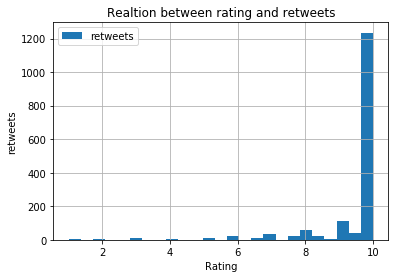

In [44]:
# 1- The impcat of rating on retweet?

twitter_archive_master.groupby('retweets')['Rating'].mean().hist(alpha=1,bins=25,label='retweets');
plt.xlabel("Rating")
plt.ylabel("retweets")
plt.title("Realtion between rating and retweets")
plt.legend();

###### From previous histogram it shows that dog who has high rating gains more retweet.

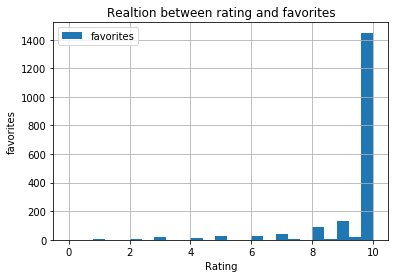

In [45]:
# 2- The impact of rating on favourite ?
twitter_archive_master.groupby('favorites')['Rating'].mean().hist(alpha=1,bins=25,label='favorites');
plt.xlabel("Rating")
plt.ylabel("favorites")
plt.title("Realtion between rating and favorites")
plt.legend();

###### From previous histogram it shows that dog who has high rating gains more favorites .

In [46]:
sources = twitter_archive_master.source.value_counts().keys()
source_name = ['iPhone', 'Web', 'TweetDeck']
for i in range(len(source_name)):
    twitter_archive_master.source.replace(sources[i], source_name[i], inplace=True)

In [47]:
twitter_archive_master.source.value_counts()

iPhone       1955
Web            28
TweetDeck      11
Name: source, dtype: int64

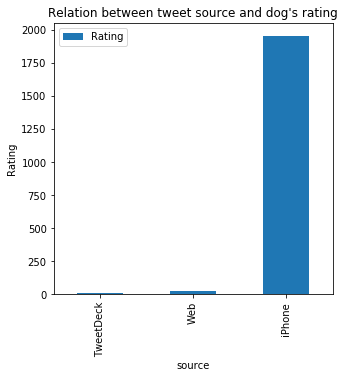

In [48]:
twitter_archive_master[['source','Rating']].groupby('source').count().plot.bar(figsize=(5,5));
plt.xlabel("source")
plt.ylabel("Rating")
plt.title("Relation between tweet source and dog's rating")
plt.legend();

######  Previous chart shows that tweets from iphones have higher than tweets from other sources.

###### Referances:
https://stackoverflow.com/questions 

https://stackoverflow.com/questions/53393597/changing-4-columns-in-only-1

https://github.com/AreejAlZahrani/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb 

https://github.com/latinacode/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb 

https://github.com/MrGeislinger/UdacityDAND_Proj_WrangleAndAnalyzeData/blob/master/wrangle_act.ipynb